In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl


tc = create_taiga_client_v3()

In [9]:
airlines = tc.get(name='nycflights-2013-b1ae', version=1, file='airlines')
airports = tc.get(name='nycflights-2013-b1ae', version=1, file='airports')
flights = tc.get(name='nycflights-2013-b1ae', version=1, file='flights')
planes = tc.get(name='nycflights-2013-b1ae', version=1, file='planes')
weather = tc.get(name='nycflights-2013-b1ae', version=1, file='weather')

In [10]:
batting = tc.get('baseball-ac61.1/Batting')
pitching = tc.get('baseball-ac61.1/Pitching')
fielding = tc.get('baseball-ac61.1/Fielding')

In [12]:
flights['sched_dep_dt']=pd.to_datetime(flights.time_hour) + pd.to_timedelta(flights.minute,unit='m')
flights['dep_dt']=(flights.sched_dep_dt) + pd.to_timedelta(flights.dep_delay,unit='m')


In [13]:
arr_mins = pd.to_timedelta(flights.sched_arr_time % 10 + flights.sched_arr_time % 100,unit='m')
arr_hr = pd.to_timedelta(flights.sched_arr_time//100,unit='hour')
arr_day = flights.dep_dt.dt.floor(freq='d')
arr_dt = arr_day + arr_hr + arr_mins
flights['sched_arr_dt'] = arr_dt


In [14]:
flights.loc[flights.sched_arr_dt < flights.sched_dep_dt,'sched_arr_dt'] += pd.to_timedelta([1]*(flights.sched_arr_dt < flights.sched_dep_dt).sum(),unit='day')

In [15]:
flights['arr_dt'] = flights.sched_arr_dt + pd.to_timedelta(flights.arr_delay,unit='m')

In [ ]:
flights.groupby(['month','day']).dep_delay.mean()
#groupby more than one list

month  day
1      1      11.548926
       2      13.858824
       3      10.987832
       4       8.951595
       5       5.732218
                ...    
12     27     10.937630
       28      7.981550
       29     22.309551
       30     10.698113
       31      6.996053
Name: dep_delay, Length: 365, dtype: float64

In [ ]:
flights.iloc[:5].T
# T means direction

,0,1,2,3,4
year,2013,2013,2013,2013,2013
month,1,1,1,1,1
day,1,1,1,1,1
dep_time,517.0,533.0,542.0,544.0,554.0
sched_dep_time,515,529,540,545,600
dep_delay,2.0,4.0,2.0,-1.0,-6.0
arr_time,830.0,850.0,923.0,1004.0,812.0
sched_arr_time,819,830,850,1022,837
arr_delay,11.0,20.0,33.0,-18.0,-25.0
carrier,UA,UA,AA,B6,DL


In [ ]:
flights.dtypes
#

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour                 object
sched_dep_dt      datetime64[ns]
dep_dt            datetime64[ns]
sched_arr_dt      datetime64[ns]
arr_dt            datetime64[ns]
dtype: object

In [ ]:
flights.isna().mean()
# insa 

year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
sched_dep_dt      0.000000
dep_dt            0.024512
sched_arr_dt      0.024512
arr_dt            0.028001
dtype: float64

In [ ]:
flights.nunique()
# num of the unique values each types

year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
sched_dep_dt      127328
dep_dt            211717
sched_arr_dt      145352
arr_dt            219685
dtype: int64

In [ ]:
flights.describe()
# stat info for the data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000,336776,328521,328521,327346
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100,2013-07-03 05:28:50.290994944,2013-07-03 17:42:40.203274752,2013-07-03 19:59:33.335768064,2013-07-03 20:39:13.690101760
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 07:12:00,2013-01-01 07:08:00
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000,2013-04-04 13:29:00,2013-04-05 06:38:00,2013-04-05 09:12:00,2013-04-05 08:00:00
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000,2013-07-03 10:30:00,2013-07-04 09:29:00,2013-07-04 12:04:00,2013-07-04 12:01:30
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000,2013-10-01 07:00:00,2013-10-01 16:38:00,2013-10-01 19:00:00,2013-10-01 20:14:45
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000,2013-12-31 23:59:00,2014-01-01 00:26:00,2014-01-01 23:56:00,2014-01-02 01:32:00
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846,NaN,NaN,NaN,NaN


In [29]:
flights_nc = flights.loc[~(flights.dep_time.isna()|flights.arr_time.isna()),:]
# nc means non cancel flights
# | means either dep or arr is true
flights_nc

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,SYR,41.0,209,22,45,2013-09-30 22:00:00,2013-09-30 22:45:00,2013-09-30 22:40:00,2013-09-30 23:52:00,2013-09-30 23:35:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,BUF,52.0,301,22,50,2013-09-30 22:00:00,2013-09-30 22:50:00,2013-09-30 22:40:00,2013-10-01 00:14:00,2013-09-30 23:54:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,ROC,47.0,264,22,46,2013-09-30 22:00:00,2013-09-30 22:46:00,2013-09-30 22:41:00,2013-10-01 00:02:00,2013-09-30 23:46:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,BOS,33.0,187,22,55,2013-09-30 22:00:00,2013-09-30 22:55:00,2013-09-30 23:07:00,2013-10-01 00:06:00,2013-10-01 00:07:00


Text(0, 0.5, 'excess arr')

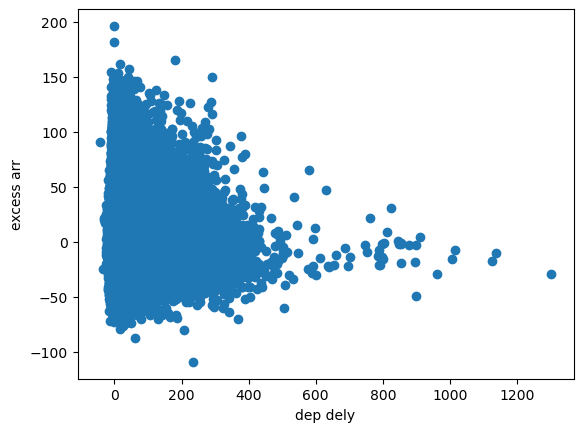

In [34]:
plt.scatter(flights_nc.dep_delay,flights_nc.arr_delay - flights_nc.dep_delay)
plt.xlabel('dep dely')
plt.ylabel('excess arr')

In [ ]:
# let's do grouping
# check which airport is best to go with less delay!

flights_nc.groupby('origin').dep_delay.mean()
# mean of delay time of each airports

origin
EWR    15.035216
JFK    12.044673
LGA    10.298725
Name: dep_delay, dtype: float64

In [36]:
flights_nc.groupby('origin').dep_delay.std()

origin
EWR    41.198540
JFK    38.863810
LGA    39.923435
Name: dep_delay, dtype: float64

In [ ]:
dfg_flights_nc = flights_nc.groupby('origin')
# dfg means dataframe grouped i guess
# flights_nc.groupby('origin') is a object, we can store it as dfg_

In [ ]:
dfg_flights_nc

In [ ]:
flights_nc.sort_values('origin').iloc[:,:14]
# sort by the origin

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH
105759,2013,12,25,1735.0,1710,25.0,1842.0,1834,8.0,EV,4195,N13956,EWR,PWM
105757,2013,12,25,1729.0,1725,4.0,2022.0,2045,-23.0,VX,169,N641VA,EWR,LAX
237323,2013,6,17,911.0,915,-4.0,1206.0,1215,-9.0,VX,161,N847VA,EWR,LAX
237328,2013,6,17,916.0,920,-4.0,1303.0,1210,53.0,AA,1223,N526AA,EWR,DFW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199208,2013,5,7,858.0,859,-1.0,1127.0,1138,-11.0,DL,1747,N612DL,LGA,ATL
132147,2013,2,24,1657.0,1700,-3.0,1821.0,1836,-15.0,UA,741,N429UA,LGA,ORD
266775,2013,7,18,1151.0,1155,-4.0,1302.0,1310,-8.0,MQ,3461,N5PBMQ,LGA,BNA
266773,2013,7,18,1151.0,1200,-9.0,1251.0,1314,-23.0,US,2173,N748UW,LGA,DCA


In [39]:
flights_nc.groupby('dest').dep_delay.mean().sort_values()

dest
LEX    -9.000000
PSP    -2.944444
EYW     3.647059
STT     4.613900
XNA     6.362189
         ...    
TYS    28.382353
BHM    29.014870
OKC    29.853583
CAE    33.811321
TUL    34.784512
Name: dep_delay, Length: 104, dtype: float64

In [40]:
flights_nc.groupby('dest').dep_delay.std().sort_values()

dest
PSP     5.945559
EYW    13.200100
HDN    17.215505
SNA    22.566766
ANC    25.592619
         ...    
TVC    55.640910
BHM    56.071248
CAK    57.214617
HNL    57.925586
LEX          NaN
Name: dep_delay, Length: 104, dtype: float64

In [42]:
flights_nc[flights_nc.dest == 'LEX']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
77948,2013,11,24,2026.0,2035,-9.0,2227.0,2249,-22.0,9E,...,LEX,90.0,604,20,35,2013-11-24 20:00:00,2013-11-24 20:35:00,2013-11-24 20:26:00,2013-11-24 22:58:00,2013-11-24 22:36:00


Text(0, 0.5, 'dest delay dep std')

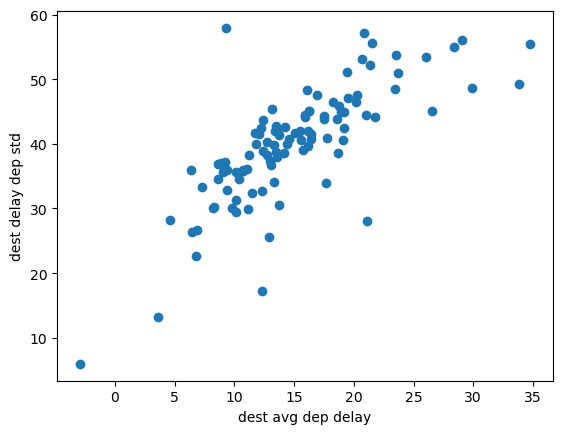

In [46]:
plt.scatter(flights_nc.groupby('dest').dep_delay.mean(),
            flights_nc.groupby('dest').dep_delay.std())
plt.xlabel('dest avg dep delay')
plt.ylabel('dest delay dep std')

In [47]:
dfg_dest = flights_nc.groupby('dest')
dfg_dest.agg({'dep_delay':['mean','std']})

dep_delay           
           mean        std
dest                      
ABQ   13.740157  30.526011
ACK    6.456604  26.320270
ALB   23.447368  48.486180
ANC   12.875000  25.592619
ATL   12.443904  43.752597
...         ...        ...
TPA   12.109130  41.531693
TUL   34.784512  55.427034
TVC   21.536842  55.640910
TYS   28.382353  55.012280
XNA    6.362189  35.901705

[104 rows x 2 columns]

In [ ]:
dfg_dest.agg({'dep_delay':['mean','std']}).corr()
# corr means correlation

dep_delay          
                    mean       std
dep_delay mean  1.000000  0.757348
          std   0.757348  1.000000

In [ ]:
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std']))
# just more effecincy to use functions

/var/folders/pk/n17zm_vn57n68qq968qpjwm40000gn/T/ipykernel_2132/55353507.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std']))


,mean,std
dest,,
ABQ,7.370106,0.544402
ACK,4.815894,0.509358
ALB,4.538350,0.415422
ANC,8.166432,0.292883
ATL,6.753035,0.566571
...,...,...
TPA,6.984943,0.521179
TUL,6.873666,0.624483
TVC,6.901976,0.449430


In [50]:
dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])).corr()

/var/folders/pk/n17zm_vn57n68qq968qpjwm40000gn/T/ipykernel_2132/2431815833.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfg_dest.apply(lambda x: (x.distance/x.air_time).agg(['mean','std'])).corr()


,mean,std
mean,1.000000,-0.223107
std,-0.223107,1.000000


In [51]:
dfg_dest.groups

{'ABQ': [27881, 28867, 29830, 30848, 31579, 32436, 33314, 34410, 35366, 36326, 37307, 38086, 38933, 39916, 40960, 41860, 42859, 43839, 44588, 45450, 46430, 47417, 48382, 49387, 50344, 51087, 51942, 52927, 53906, 54874, 55804, 56729, 57514, 58376, 59351, 60320, 61287, 62239, 63252, 64035, 64855, 65856, 66828, 67811, 68799, 69781, 70552, 71340, 72357, 73359, 74323, 75334, 76327, 77114, 77927, 78916, 79883, 80845, 81623, 82253, 83061, 84021, 85045, 86041, 87002, 87791, 88855, 89660, 90448, 91393, 92231, 93349, 94313, 95284, 95937, 96855, 97816, 98732, 99735, 100722, 101651, 102501, 103360, 104342, 105167, 105881, 106777, 107753, 108570, 109421, 110407, 111229, 185558, 186716, 187700, 188693, 189680, 190500, 191383, 192361, ...], 'ACK': [27377, 28354, 29331, 30090, 30318, 31242, 31725, 31929, 32697, 32939, 33946, 34868, 35849, 36622, 36834, 37761, 38241, 38442, 39184, 39417, 43350, 44956, 49862, 207754, 208732, 209699, 210405, 211367, 212357, 213371, 214143, 214310, 215048, 215254, 216006,

In [ ]:
df_tail_agg = flights_nc.groupby('tailnum').agg({'arr_delay':['mean','std','count']})
# agg 
df_tail_agg.corr()

arr_delay                    
                     mean       std     count
arr_delay mean   1.000000  0.733224 -0.010966
          std    0.733224  1.000000  0.077598
          count -0.010966  0.077598  1.000000

In [54]:
# what dest have the most carriers
flights_nc.groupby('dest').carrier.nunique().sort_values(ascending=False).iloc[:20]

dest
ORD    7
CLT    7
ATL    7
BOS    7
TPA    7
DTW    6
PIT    6
STL    6
DCA    6
AUS    6
MSY    6
MSP    6
IAD    6
SFO    5
RDU    5
CLE    5
PHX    5
SEA    5
DEN    5
PHL    5
Name: carrier, dtype: int64

<Axes: >

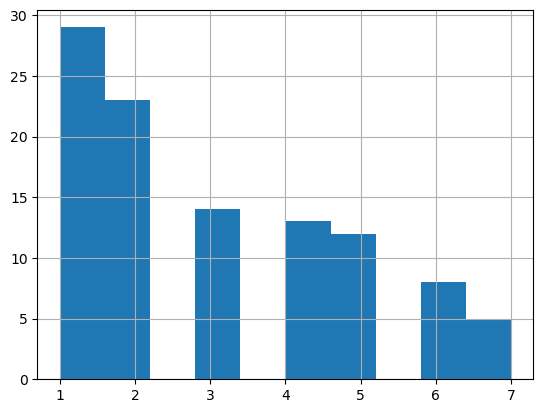

In [55]:
flights_nc.groupby('dest').carrier.nunique().hist()

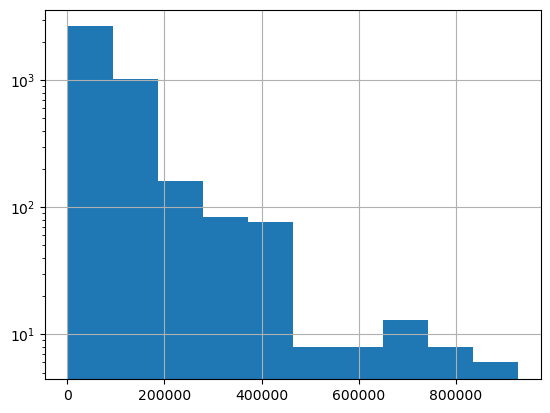

In [61]:
flights_nc.groupby('tailnum').distance.sum().hist()
plt.yscale('log')

In [ ]:
flights_nc[flights_nc.dep_dt.dt.hour < 5]
#

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
842,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,...,SJU,189.0,1598,23,59,2013-01-02 23:00:00,2013-01-02 23:59:00,2013-01-03 00:42:00,2013-01-03 04:44:00,2013-01-03 05:20:00
843,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,...,SYR,49.0,209,22,50,2013-01-02 22:00:00,2013-01-02 22:50:00,2013-01-03 01:26:00,2013-01-04 00:08:00,2013-01-04 02:42:00
844,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,...,CLT,108.0,529,5,0,2013-01-02 05:00:00,2013-01-02 05:00:00,2013-01-02 04:58:00,2013-01-02 06:50:00,2013-01-02 07:03:00
1785,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,...,SJU,193.0,1598,23,59,2013-01-03 23:00:00,2013-01-03 23:59:00,2013-01-04 00:32:00,2013-01-04 04:44:00,2013-01-04 05:06:00
1786,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,...,BUF,58.0,301,21,45,2013-01-03 21:00:00,2013-01-03 21:45:00,2013-01-04 00:50:00,2013-01-04 23:12:00,2013-01-05 02:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331219,2013,9,25,451.0,500,-9.0,636.0,648,-12.0,US,...,CLT,84.0,529,5,0,2013-09-25 05:00:00,2013-09-25 05:00:00,2013-09-25 04:51:00,2013-09-25 06:56:00,2013-09-25 06:44:00
332195,2013,9,26,451.0,500,-9.0,619.0,648,-29.0,US,...,CLT,72.0,529,5,0,2013-09-26 05:00:00,2013-09-26 05:00:00,2013-09-26 04:51:00,2013-09-26 06:56:00,2013-09-26 06:27:00
333191,2013,9,27,453.0,500,-7.0,627.0,648,-21.0,US,...,CLT,76.0,529,5,0,2013-09-27 05:00:00,2013-09-27 05:00:00,2013-09-27 04:53:00,2013-09-27 06:56:00,2013-09-27 06:35:00
334187,2013,9,28,451.0,500,-9.0,627.0,648,-21.0,US,...,CLT,77.0,529,5,0,2013-09-28 05:00:00,2013-09-28 05:00:00,2013-09-28 04:51:00,2013-09-28 06:56:00,2013-09-28 06:35:00


## Execises
- look at the number of cancelled flights per day. pattern? proportion of cancelled flights related to ave delay?
- which carrier worst delay? distangle the effects of airports vs bad carriers
- count and nunique are common ways of looking at a dataset. when do you use one vs the other

In [87]:
flights_cl = flights.loc[(flights.dep_time.isna()|flights.arr_time.isna()),:]
# nc means non cancel flights
# | means either dep or arr is false
# isna() methods mean the value is not a num?
flights_cl

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,...,OKC,NaN,1325,19,30,2013-01-01 19:00:00,2013-01-01 19:30:00,2013-01-01 20:16:00,2013-01-01 22:20:00,NaT
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,...,RDU,NaN,416,16,30,2013-01-01 16:00:00,2013-01-01 16:30:00,NaT,NaT,NaT
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,...,DFW,NaN,1389,19,35,2013-01-01 19:00:00,2013-01-01 19:35:00,NaT,NaT,NaT
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,...,MIA,NaN,1096,15,0,2013-01-01 15:00:00,2013-01-01 15:00:00,NaT,NaT,NaT
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,...,FLL,NaN,1069,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


<Axes: >

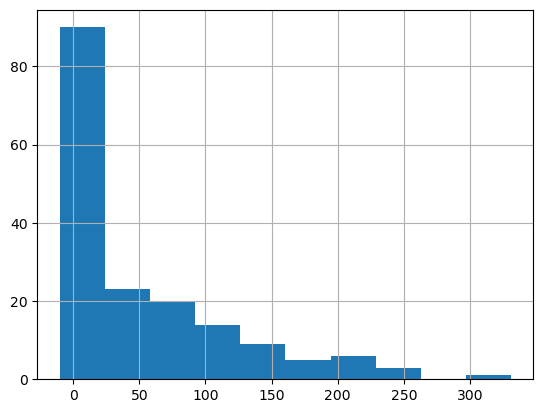

In [90]:
flights_cl.groupby(['month','day']).dep_delay.mean().hist()


In [75]:
flights_cl.groupby(['month','day'])
flights_cl

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,...,OKC,NaN,1325,19,30,2013-01-01 19:00:00,2013-01-01 19:30:00,2013-01-01 20:16:00,2013-01-01 22:20:00,NaT
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,...,RDU,NaN,416,16,30,2013-01-01 16:00:00,2013-01-01 16:30:00,NaT,NaT,NaT
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,...,DFW,NaN,1389,19,35,2013-01-01 19:00:00,2013-01-01 19:35:00,NaT,NaT,NaT
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,...,MIA,NaN,1096,15,0,2013-01-01 15:00:00,2013-01-01 15:00:00,NaT,NaT,NaT
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,...,FLL,NaN,1069,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,DCA,NaN,213,14,55,2013-09-30 14:00:00,2013-09-30 14:55:00,NaT,NaT,NaT
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,SYR,NaN,198,22,0,2013-09-30 22:00:00,2013-09-30 22:00:00,NaT,NaT,NaT
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,BNA,NaN,764,12,10,2013-09-30 12:00:00,2013-09-30 12:10:00,NaT,NaT,NaT
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,CLE,NaN,419,11,59,2013-09-30 11:00:00,2013-09-30 11:59:00,NaT,NaT,NaT


In [ ]:
plt.scatter(flights_cl.groupby(['month','day']).dep_delay.mean(),
            flights_cl.groupby(['month','day']).dep_delay.mean())
plt.xlabel('')
plt.ylabel('')

flights_nc = flights.loc[~(flights.dep_time.isna()|flights.arr_time.isna()),:]
# nc means non cancel flights
# | means either dep or arr is true
flights_nc

In [95]:
dfg_day = flights.groupby(['day','month'])
dfg_day.dep_delay.mean()

day  month
1    1        11.548926
     2        10.852909
     3        11.015890
     4        12.421436
     5         2.903427
                ...    
31   5         9.274227
     7         6.280843
     8         4.587278
     10        5.163577
     12        6.996053
Name: dep_delay, Length: 365, dtype: float64

In [101]:
dfg_day.arr_time.apply(lambda x: x.isna().sum())

day  month
1    1         5
     2        16
     3        14
     4         9
     5         2
              ..
31   5        21
     7         4
     8         5
     10        6
     12       16
Name: arr_time, Length: 365, dtype: int64

In [104]:
dfg_day.agg({'dep_delay':'mean','arr_time': lambda x: x.isna().mean()}).corr()

,dep_delay,arr_time
dep_delay,1.000000,0.568053
arr_time,0.568053,1.000000


In [105]:
flights[(flights.day == 1)& (flights.month == 1)].dep_time.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
837    False
838     True
839     True
840     True
841     True
Name: dep_time, Length: 842, dtype: bool

# Joins!

In [109]:
df_flight_small = flights [['sched_dep_dt','dep_dt','sched_arr_dt','arr_dt','origin','tailnum','carrier']]

df_flight_small

,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,tailnum,carrier
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,N14228,UA
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,N24211,UA
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,N619AA,AA
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,N804JB,B6
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,N668DN,DL
...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,None,9E
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,None,9E
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,N535MQ,MQ
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,N511MQ,MQ


In [108]:
airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [ ]:
# we want to matche carrier with the full names

df_flight_small.merge(airlines, left_on='carrier',right_on='carrier')
# take left refer and match 


,sched_dep_dt,dep_dt,sched_arr_dt,arr_dt,origin,tailnum,carrier,name
0,2013-01-01 05:15:00,2013-01-01 05:17:00,2013-01-01 08:28:00,2013-01-01 08:39:00,EWR,N14228,UA,United Air Lines Inc.
1,2013-01-01 05:29:00,2013-01-01 05:33:00,2013-01-01 08:30:00,2013-01-01 08:50:00,LGA,N24211,UA,United Air Lines Inc.
2,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 08:50:00,2013-01-01 09:23:00,JFK,N619AA,AA,American Airlines Inc.
3,2013-01-01 05:45:00,2013-01-01 05:44:00,2013-01-01 10:24:00,2013-01-01 10:06:00,JFK,N804JB,B6,JetBlue Airways
4,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:44:00,2013-01-01 08:19:00,LGA,N668DN,DL,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...
336771,2013-09-30 14:55:00,NaT,NaT,NaT,JFK,None,9E,Endeavor Air Inc.
336772,2013-09-30 22:00:00,NaT,NaT,NaT,LGA,None,9E,Endeavor Air Inc.
336773,2013-09-30 12:10:00,NaT,NaT,NaT,LGA,N535MQ,MQ,Envoy Air
336774,2013-09-30 11:59:00,NaT,NaT,NaT,LGA,N511MQ,MQ,Envoy Air


In [ ]:
#check it is a good primary key
len(airlines) == airlines.carrier.unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [119]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                   'data1' : pd.Series(range(7),dtype='Int64')})

df2 = pd.DataFrame({'key':['a','b','d'],
                   'data2' : pd.Series(range(3),dtype='Int64')})

# how to create a dataframe

In [115]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [116]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [120]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [121]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [123]:
pd.merge(df1, df2.rename(columns={'key':'key2'}),left_on='key',right_on='key2')

,key,data1,key2,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [ ]:
pd.merge(df1,df2,on='key',how='outer')
# how= 'outer' will keep some value only appear in one dataframe


,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,c,3,<NA>
7,d,<NA>,2


In [125]:
pd.merge(df1,df2,on='key',how='right')

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,d,<NA>,2


In [126]:
pd.merge(df1,df2,on='key',how='left')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,c,3,<NA>
4,a,4,0
5,a,5,0
6,b,6,1


In [128]:
pd.merge(df1, df2.rename(columns={'key':'key2'}),left_on='key',right_on='key2', how='outer')

,key,data1,key2,data2
0,a,2,a,0
1,a,4,a,0
2,a,5,a,0
3,b,0,b,1
4,b,1,b,1
5,b,6,b,1
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [129]:
# you can merge on multiplke keys as an combination key
left = pd.DataFrame({'key1':['foo','foo','bar'],
                     'key2':['one','two','one'],
                     'lval':pd.Series([1,2,3],dtype='Int64')})
right = pd.DataFrame({'key1':['foo','foo','bar','foo'],
                      'key2':['one','one','one','two'],
                      'rval':pd.Series([4,5,6,7],dtype='Int64')})

In [130]:
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,lval,rval
0,bar,one,3,6
1,foo,one,1,4
2,foo,one,1,5
3,foo,two,2,7


In [131]:
pd.merge(left,right,on=['key1','key2'])

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,7
3,bar,one,3,6


In [132]:
(~right[['key1','key2']].duplicated()).all()

np.False_